<a href="https://colab.research.google.com/github/vyzkhd/Deep-Learning-Projects/blob/master/Cattle_Breed_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Projects/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = Path(base_dir+'data/cattle')
path.mkdir(parents=True,exist_ok=True)

In [5]:
path.ls()

[PosixPath('/content/gdrive/My Drive/Projects/data/cattle/hereford'),
 PosixPath('/content/gdrive/My Drive/Projects/data/cattle/hereford.txt'),
 PosixPath('/content/gdrive/My Drive/Projects/data/cattle/charolais'),
 PosixPath('/content/gdrive/My Drive/Projects/data/cattle/charolais.txt'),
 PosixPath('/content/gdrive/My Drive/Projects/data/cattle/brownswiss'),
 PosixPath('/content/gdrive/My Drive/Projects/data/cattle/brownswiss.txt'),
 PosixPath('/content/gdrive/My Drive/Projects/data/cattle/guernsey'),
 PosixPath('/content/gdrive/My Drive/Projects/data/cattle/guernsey.txt'),
 PosixPath('/content/gdrive/My Drive/Projects/data/cattle/terentaise'),
 PosixPath('/content/gdrive/My Drive/Projects/data/cattle/terentaise.txt'),
 PosixPath('/content/gdrive/My Drive/Projects/data/cattle/pinzgauer.txt'),
 PosixPath('/content/gdrive/My Drive/Projects/data/cattle/pinzgauer'),
 PosixPath('/content/gdrive/My Drive/Projects/data/cattle/jersey'),
 PosixPath('/content/gdrive/My Drive/Projects/data/cattl

In [0]:
np.random.seed(24)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['brownswiss',
 'charolais',
 'guernsey',
 'hereford',
 'jersey',
 'pinzgauer',
 'terentaise']

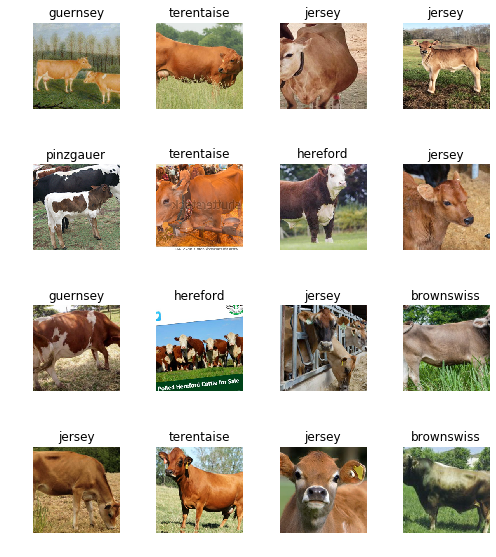

In [8]:
data.show_batch(rows=4, figsize=(7,8))

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 45195339.59it/s]


In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.155077,1.337740,0.414966,00:26
1,1.573242,0.788495,0.272109,00:10
2,1.247874,0.739921,0.251701,00:09
3,1.035407,0.736754,0.251701,00:09


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


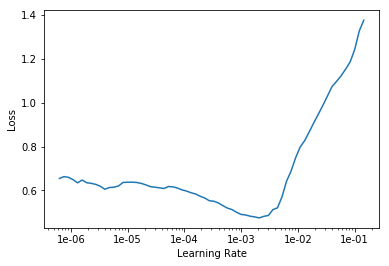

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(2,max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.852283,1.101815,0.333333,00:09
1,0.783890,1.001331,0.306122,00:09


In [0]:
learn.save('stage-2')

In [19]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (592 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
hereford,hereford,hereford,hereford,hereford
Path: /content/gdrive/My Drive/Projects/data/cattle;

Valid: LabelList (147 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
hereford,charolais,brownswiss,guernsey,pinzgauer
Path: /content/gdrive/My Drive/Projects/data/cattle;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

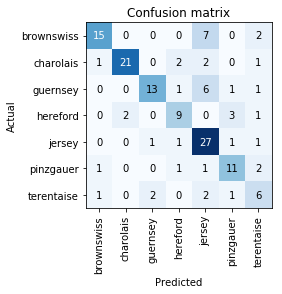

In [21]:
interp.plot_confusion_matrix()